<a href="https://colab.research.google.com/github/LokiAndere/MIARFID-RNA-2019-20/blob/master/gan_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


iteration 1 / 4321
iteration 2 / 4321
iteration 3 / 4321
iteration 4 / 4321
iteration 5 / 4321
iteration 6 / 4321
iteration 7 / 4321
iteration 8 / 4321
iteration 9 / 4321
iteration 10 / 4321
iteration 11 / 4321
iteration 12 / 4321
iteration 13 / 4321
iteration 14 / 4321
iteration 15 / 4321
iteration 16 / 4321
iteration 17 / 4321
iteration 18 / 4321
iteration 19 / 4321
iteration 20 / 4321
iteration 21 / 4321
iteration 22 / 4321
iteration 23 / 4321
iteration 24 / 4321
iteration 25 / 4321
iteration 26 / 4321
iteration 27 / 4321
iteration 28 / 4321
iteration 29 / 4321
iteration 30 / 4321
iteration 31 / 4321
iteration 32 / 4321
iteration 33 / 4321
iteration 34 / 4321
iteration 35 / 4321
iteration 36 / 4321
iteration 37 / 4321
iteration 38 / 4321
iteration 39 / 4321
iteration 40 / 4321
iteration 41 / 4321
iteration 42 / 4321
iteration 43 / 4321
iteration 44 / 4321
iteration 45 / 4321
iteration 46 / 4321
iteration 47 / 4321
iteration 48 / 4321
iteration 49 / 4321
iteration 50 / 4321
iteration

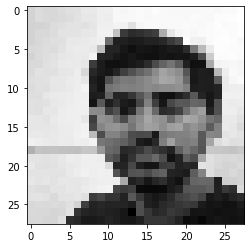

(4231, 28, 28, 1)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.preprocessing.image import array_to_img, img_to_array, load_img

dirPalomaPrefix = 'drive/My Drive/miarfid/data/validation/human/'
dirCazadorPrefix = 'drive/My Drive/miarfid/data/test/human/'
dirTrainGenPrefix = 'drive/My Drive/miarfid/data/train/human/'
okDirGen = 'drive/My Drive/miarfid/ggg/data/train/faces/'

dir = okDirGen
img_data = []
j = 0

for file0 in os.listdir(dir):
    img = load_img(dir + file0, grayscale=True, target_size = (28,28))
    img_array = img_to_array(img)
    if j == 0 : nparray = np.array([img_array])
    else : nparray=np.append(nparray,[img_array],axis=0)
    if j == 8 :
      example = img
    j+=1
    print(f"iteration {j} / 4321")
plt.imshow(example, cmap='gray')
plt.show()
print(nparray.shape)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:355: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 2450 images belonging to 1 classes.
Found 4231 images belonging to 1 classes.
Found 56 images belonging to 1 classes.
Found 25 images belonging to 1 classes.
(28, 28, 3)


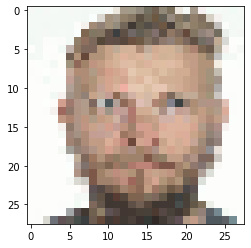

In [4]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing.image import array_to_img, img_to_array, load_img

dirPalomaPrefix0 = 'drive/My Drive/miarfid/data/validation/'
dirCazadorPrefix0 = 'drive/My Drive/miarfid/data/test/'
dirTrainGenPrefix0 = 'drive/My Drive/miarfid/data/train/'
okDirGen = 'drive/My Drive/miarfid/train/'
okDirGen2 = 'drive/My Drive/miarfid/ggg/data/train/'

datagen = ImageDataGenerator(
)
vdatagen = ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True,
    samplewise_std_normalization = True,
    rescale = (28,28)
)

train_it = datagen.flow_from_directory(dirTrainGenPrefix0, target_size = (28,28), color_mode = "grayscale",shuffle=False,  class_mode=None, batch_size=64)
train_it2 = datagen.flow_from_directory(okDirGen2, target_size = (28,28), color_mode = "grayscale",shuffle=False,  class_mode=None, batch_size=64)
val_it = datagen.flow_from_directory(dirPalomaPrefix0, target_size = (28,28), color_mode = "rgb", class_mode=None, shuffle=False, batch_size=1)
test_it = datagen.flow_from_directory(dirCazadorPrefix0, target_size = (28,28), color_mode = "grayscale", class_mode=None,shuffle=False,  batch_size=1)

print(val_it[54][0].shape)
example = array_to_img (val_it[0][0])
plt.imshow(example)
plt.show()

(4231, 28, 28, 1)
(28, 28, 1)
(4231, 28, 28)


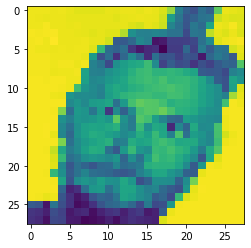

In [12]:
vdatagen.fit(nparray)
print(nparray.shape)
print(nparray[0].shape)
tete = nparray[:, :, :, 0]
print(tete.shape)
nop = 88
example = array_to_img (nparray[nop])
plt.imshow(example)
plt.show()

In [0]:
import keras
from keras.datasets.fashion_mnist import load_data
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Reshape
from keras.layers import Conv2D, DepthwiseConv2D, Conv2DTranspose
from keras.layers import MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from keras.layers import ZeroPadding2D, UpSampling2D, Activation
from keras.layers import ELU, PReLU, LeakyReLU, BatchNormalization
from keras.layers.normalization import BatchNormalization as BN
from keras.layers import GaussianNoise as GN
from keras.optimizers import SGD, Adam
from numpy import expand_dims
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import LearningRateScheduler as LRS
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.regularizers import l2
from numpy import zeros, ones
from numpy.random import randn, randint, normal

img_rows = 28
img_columns = 28
channels = 1
latent_dim = 100
s1 = int(img_rows/2.0)
s2 = int(img_columns/2.0)
sl1 = int(s1/2.0)
sl2 = int(s2/2.0)
img_shape = (img_rows, img_columns, channels)
epochs=100
batch=50

filters = 2
filter_shape_2 = 2
filter_shape_3 = 3

optimizer = Adam(lr=0.0002, beta_1=0.5)


In [67]:
descriminator = Sequential()
descriminator.add(Conv2D(filters**5, kernel_size=(filter_shape_3,filter_shape_3), strides=(2,2), padding='same', input_shape=img_shape))
descriminator.add(LeakyReLU(alpha=0.2))
descriminator.add(Dropout(0.2))
descriminator.add(Conv2D(filters**6, kernel_size=(filter_shape_3,filter_shape_3), strides=(2,2), padding='same'))
descriminator.add(ZeroPadding2D(padding=((1,1),(1,1))))
descriminator.add(BatchNormalization(momentum=0.8))
descriminator.add(LeakyReLU(alpha=0.2))
descriminator.add(Dropout(0.2))
descriminator.add(Conv2D(filters**7, kernel_size=(filter_shape_3,filter_shape_3), strides=(2,2), padding='same'))
descriminator.add(ZeroPadding2D(padding=((1,1),(1,1))))
descriminator.add(BatchNormalization(momentum=0.8))
descriminator.add(LeakyReLU(alpha=0.2))
descriminator.add(Dropout(0.2))
descriminator.add(Conv2D(filters**8, kernel_size=(filter_shape_3,filter_shape_3), strides=(2,2), padding='same'))
descriminator.add(ZeroPadding2D(padding=((0,1),(0,1))))
descriminator.add(BatchNormalization(momentum=0.8))
descriminator.add(LeakyReLU(alpha=0.2))
descriminator.add(Dropout(0.2))
descriminator.add(Flatten())
descriminator.add(Dropout(0.4))
descriminator.add(Dense(1))
descriminator.add(Activation("sigmoid"))
for layer in descriminator.layers:
    print(layer.output_shape)

(None, 14, 14, 32)
(None, 14, 14, 32)
(None, 14, 14, 32)
(None, 7, 7, 64)
(None, 9, 9, 64)
(None, 9, 9, 64)
(None, 9, 9, 64)
(None, 9, 9, 64)
(None, 5, 5, 128)
(None, 7, 7, 128)
(None, 7, 7, 128)
(None, 7, 7, 128)
(None, 7, 7, 128)
(None, 4, 4, 256)
(None, 5, 5, 256)
(None, 5, 5, 256)
(None, 5, 5, 256)
(None, 5, 5, 256)
(None, 6400)
(None, 6400)
(None, 1)
(None, 1)


In [81]:
descriminator = Sequential()
descriminator.add(Conv2D(filters**7, kernel_size=(filter_shape_3,filter_shape_3), strides=(2,2), padding='same', input_shape=img_shape))
descriminator.add(LeakyReLU(alpha=0.2))
descriminator.add(Conv2D(filters**7, kernel_size=(filter_shape_3,filter_shape_3), strides=(2,2), padding='same', input_shape=img_shape))
descriminator.add(LeakyReLU(alpha=0.2))
descriminator.add(Flatten())
descriminator.add(Dropout(0.4))
descriminator.add(Dense(1))
descriminator.add(Activation("sigmoid"))
for layer in descriminator.layers:
    print(layer.output_shape)

(None, 14, 14, 128)
(None, 14, 14, 128)
(None, 7, 7, 128)
(None, 7, 7, 128)
(None, 6272)
(None, 6272)
(None, 1)
(None, 1)


In [82]:
generator = Sequential()
nodes = filters**7 * sl1 * sl2 * channels
generator.add(Dense(nodes, input_dim=latent_dim))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Reshape((sl1, sl2, filters**7*channels)))
generator.add(Conv2DTranspose(filters**7, (filter_shape_2**2,filter_shape_2**2), strides=(2,2), padding='same'))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Conv2DTranspose(filters**7, (filter_shape_2**2,filter_shape_2**2), strides=(2,2), padding='same'))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Conv2DTranspose(channels, (sl1,sl2), padding='same'))
generator.add(Activation("tanh"))
for layer in generator.layers:
	print(layer.output_shape)

(None, 6272)
(None, 6272)
(None, 7, 7, 128)
(None, 14, 14, 128)
(None, 14, 14, 128)
(None, 28, 28, 128)
(None, 28, 28, 128)
(None, 28, 28, 1)
(None, 28, 28, 1)


In [68]:
generator = Sequential()
nodes = filters**7 * sl1 * sl2 * channels
generator.add(Dense(nodes, input_dim=latent_dim))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Reshape((sl1, sl2, filters**7*channels)))
generator.add(UpSampling2D())
generator.add(Conv2DTranspose(filters**7, (filter_shape_3,filter_shape_3), padding='same'))
generator.add(BatchNormalization(momentum=0.8))
generator.add(LeakyReLU(alpha=0.2))
generator.add(UpSampling2D())
generator.add(Conv2DTranspose(filters**6, (filter_shape_3,filter_shape_3), padding='same'))
generator.add(BatchNormalization(momentum=0.8))
generator.add(LeakyReLU(alpha=0.2))
generator.add(Conv2D(channels, (filter_shape_3,filter_shape_3), padding='same'))
generator.add(Activation("tanh"))
for layer in generator.layers:
    print(layer.output_shape)

(None, 6272)
(None, 6272)
(None, 7, 7, 128)
(None, 14, 14, 128)
(None, 14, 14, 128)
(None, 14, 14, 128)
(None, 14, 14, 128)
(None, 28, 28, 128)
(None, 28, 28, 64)
(None, 28, 28, 64)
(None, 28, 28, 64)
(None, 28, 28, 1)
(None, 28, 28, 1)


In [83]:
descriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
descriminator.trainable = False
GAN = Sequential()
GAN.add (generator)
GAN.add (descriminator)
for layer in GAN.layers:
  print(layer.output_shape)
GAN.compile(loss='binary_crossentropy', optimizer=optimizer)

(None, 28, 28, 1)
(None, 1)


my (4231, 28, 28)
my (4231, 28, 28)


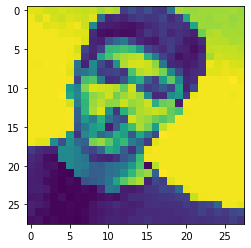

In [54]:
print(f"my {tete.shape}")
data = tete
print(f"my {data.shape}")
setM = expand_dims(data, axis=-1)
setM = setM.astype('float32')
setM = (setM - 127.5) / 127.5
nop = 89
example = array_to_img (nparray[nop])
plt.imshow(example)
plt.show()
x_train=setM

In [84]:
batch_per_epoch = int(x_train.shape[0] / batch)
print(batch_per_epoch)
half_batch = int(batch / 2)
for i in range(epochs):
  for j in range(batch_per_epoch):
    idx = randint(0, x_train.shape[0], half_batch)
    imgs = x_train[idx]
    d_loss_real, _ = descriminator.train_on_batch(imgs, ones((half_batch, 1)))
    noise0 = randn(half_batch*latent_dim)
    #print(f"noise0{noise0.shape}")
    noise0 = noise0.reshape(half_batch, latent_dim)
    #print(f"noise0{noise0.shape}")
    noise1 = generator.predict(noise0)
    #print(f"noise1{noise1.shape}")
    noise1i = normal(0, 1, (half_batch, latent_dim))
    #print(f"noise{noise.shape}")
    fake = generator.predict(noise1i)
    #print(f"fake{gen_imgs.shape}")
    d_loss_fake, _ = descriminator.train_on_batch(noise1, np.zeros((half_batch, 1)))
    noise2i = normal(0, 1, (batch, latent_dim))
    #print(f"noise2{noise2.shape}")
    noise02 = randn(batch*latent_dim)
    #print(f"noise02{noise02.shape}")
    noise02 = noise02.reshape(batch, latent_dim)
    g_loss = GAN.train_on_batch(noise02, ones((batch, 1)))
    print(f"epoch {i+1:3d} batch {j+1:3d} / {batch_per_epoch}, real loss {d_loss_real:6.3f}, fake loss {d_loss_fake:6.3f}, gan loss {g_loss:6.3f}")
print("end")
generator.save('drive/My Drive/generatorKK007.h5')

84


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


epoch   1 batch   1 / 84, real loss  0.689, fake loss  0.696, gan loss  0.691
epoch   1 batch   2 / 84, real loss  0.638, fake loss  0.700, gan loss  0.687
epoch   1 batch   3 / 84, real loss  0.590, fake loss  0.711, gan loss  0.676
epoch   1 batch   4 / 84, real loss  0.546, fake loss  0.733, gan loss  0.660
epoch   1 batch   5 / 84, real loss  0.499, fake loss  0.765, gan loss  0.633
epoch   1 batch   6 / 84, real loss  0.459, fake loss  0.815, gan loss  0.613
epoch   1 batch   7 / 84, real loss  0.432, fake loss  0.834, gan loss  0.623


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Streaming output truncated to the last 5000 lines.
epoch  41 batch  43 / 84, real loss  0.684, fake loss  0.671, gan loss  0.760
epoch  41 batch  44 / 84, real loss  0.710, fake loss  0.654, gan loss  0.765
epoch  41 batch  45 / 84, real loss  0.683, fake loss  0.679, gan loss  0.760
epoch  41 batch  46 / 84, real loss  0.717, fake loss  0.683, gan loss  0.751
epoch  41 batch  47 / 84, real loss  0.714, fake loss  0.652, gan loss  0.743
epoch  41 batch  48 / 84, real loss  0.666, fake loss  0.674, gan loss  0.748
epoch  41 batch  49 / 84, real loss  0.711, fake loss  0.685, gan loss  0.743
epoch  41 batch  50 / 84, real loss  0.690, fake loss  0.689, gan loss  0.739
epoch  41 batch  51 / 84, real loss  0.676, fake loss  0.680, gan loss  0.751
epoch  41 batch  52 / 84, real loss  0.708, fake loss  0.657, gan loss  0.739
epoch  41 batch  53 / 84, real loss  0.689, fake loss  0.664, gan loss  0.735
epoch  41 batch  54 / 84, real loss  0.689, fake loss  0.688, gan loss  0.739
epoch  41 bat

In [0]:
from numpy.random import randn
from matplotlib import pyplot as plt
from math import sqrt

batch = 5
points = 100

def show_results(m):
  global batch
  if batch < 0 : batch = 20
  n = int(sqrt(batch))
  get_input = randn(batch * points)
  print(f"01{get_input.shape}")
  get_input = get_input.reshape(batch, points)
  print(f"02{get_input.shape}")
  result = model.predict(get_input)
  print(f"03{result.shape}")
  for i in range(n*n):
    plt.subplot(n, n, i + 1)
    plt.axis('off')
    plt.imshow(result[i, :, :, 0])
  plt.show()

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


01(500,)
02(5, 100)
03(5, 28, 28, 1)


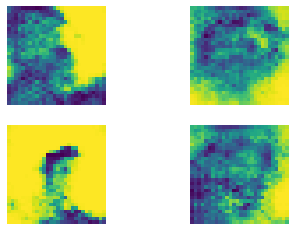

In [66]:
#do not execute! the file is lost
from keras.models import load_model

model = load_model('drive/My Drive/generatorKK.h5')
show_results(model)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


01(500,)
02(5, 100)
03(5, 28, 28, 1)


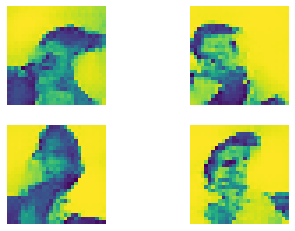

In [67]:
from keras.models import load_model

model = load_model('drive/My Drive/generatorKK3.h5')
show_results(model)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


01(500,)
02(5, 100)
03(5, 28, 28, 1)


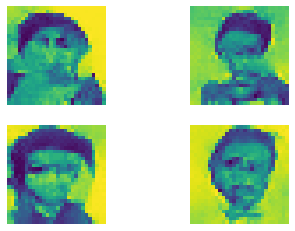

In [96]:
from keras.models import load_model

model = load_model('drive/My Drive/generatorKK000.h5')
show_results(model)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


01(500,)
02(5, 100)
03(5, 28, 28, 1)


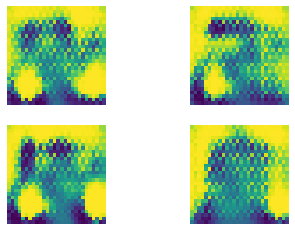

In [146]:
from keras.models import load_model

model = load_model('drive/My Drive/generatorKK001.h5')
show_results(model)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


01(500,)
02(5, 100)
03(5, 28, 28, 1)


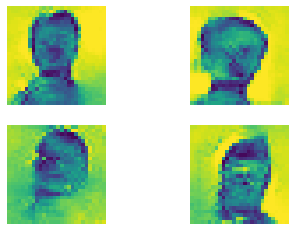

In [29]:
from keras.models import load_model

model = load_model('drive/My Drive/generatorKK002.h5')
show_results(model)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


01(500,)
02(5, 100)
03(5, 28, 28, 1)


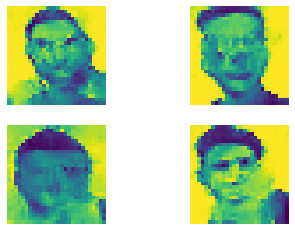

In [30]:
from keras.models import load_model

model = load_model('drive/My Drive/generatorKK003.h5')
show_results(model)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


01(500,)
02(5, 100)
03(5, 28, 28, 1)


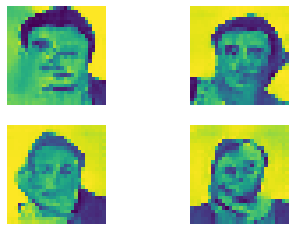

In [66]:
from keras.models import load_model

model = load_model('drive/My Drive/generatorKK004.h5')
show_results(model)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


01(500,)
02(5, 100)
03(5, 28, 28, 1)


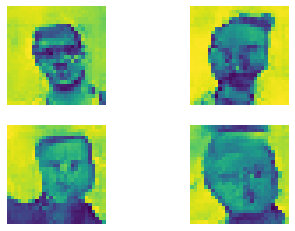

In [72]:
from keras.models import load_model

model = load_model('drive/My Drive/generatorKK005.h5')
show_results(model)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


01(500,)
02(5, 100)
03(5, 28, 28, 1)


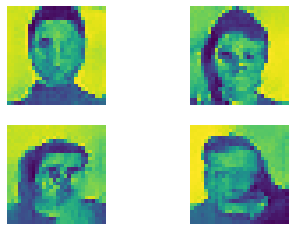

In [97]:
from keras.models import load_model

model = load_model('drive/My Drive/generatorKK006.h5')
show_results(model)